In [1]:
# Om Sri Sai Ram

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import time

import seaborn as sns


In [3]:
df0 = pd.read_csv('Index Rent Smart.csv',parse_dates=['date','last_major_renovation_date'],index_col=0)

/Users/bhavanian/myenvs/housing/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (57,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
loc_vars_categorical = ['neighborhood','zipcode_str','parcel','census_tract_number'
                            # 'st_name','st_name_suf'
                           ]

In [35]:
df0[loc_vars_categorical] = df0[loc_vars_categorical].astype(str)

In [8]:
loc_vars_num = ['latitude','longitude']

In [28]:
# list(df0)

In [29]:
demo_vars = ['ct_pop_disability',
 'ct_pop_children_under_5',
 'ct_pop_over_65',
 'ct_pop_low_to_no_income',
 'ct_pop_limited_english_proficiency',
 'ct_pop_poc',
 'ct_pop_med_illness',
 'ct_perc_disability',
 'ct_perc_children_under_5',
 'ct_perc_over_65',
 'ct_perc_low_to_no_income',
 'ct_perc_limited_english_proficiency',
 'ct_perc_poc',
 'ct_perc_med_illness',
 'ct_hh_income_200000_or_more',
 'ct_perc_income_200000_or_more']

In [9]:
df1 = df0[['address','Index'] + loc_vars_num]

In [10]:
df1

,address,Index,latitude,longitude
0,"39 Millmont St, 02119",5,42.327532,-71.090943
1,"39 Millmont St, 02119",5,42.327532,-71.090943
2,"39 Millmont St, 02119",5,42.327532,-71.090943
3,"39 Millmont St, 02119",10,42.327532,-71.090943
4,"39 Millmont St, 02119",5,42.327532,-71.090943
...,...,...,...,...
127227,"15 Bradshaw St, 02121",5,42.299000,-71.082250
127228,"133 Putnam St, 02128",5,42.378292,-71.032153
127229,"31 Prescott St, 02128",5,42.379940,-71.030620
127230,"131 Putnam St, 02128",5,42.378350,-71.032210


In [11]:
df_byaddress = df1.groupby('address').mean()

In [12]:
df_byaddress = df_byaddress.rename(columns={'Index':'Severity'})

In [13]:
index_sum = df1.groupby('address')['Index'].sum()

In [14]:
df_byaddress['Index_Sum'] = index_sum 

In [15]:
oldest_complaint = df0.groupby('address')['date'].min()

In [16]:
newest_complaint = df0.groupby('address')['date'].max()

In [17]:
df_byaddress['Timeframe'] = (newest_complaint - oldest_complaint)

In [18]:
df_byaddress['Frequency_of_Complaints'] = df_byaddress['Index_Sum'] / df_byaddress['Timeframe'].dt.days

In [19]:
df_byaddress

,Severity,latitude,longitude,Index_Sum,Timeframe,Frequency_of_Complaints
address,,,,,,
"1 Abbotsford St, 02121",5.000000,42.31465,-71.09318,10,413 days 00:00:00,0.024213
"1 Acorn St, 02108",8.000000,42.35761,-71.06857,40,650 days 01:51:00,0.061538
"1 Adams St, 02129",5.000000,42.37484,-71.06004,5,0 days 00:00:00,inf
"1 Akron Pl, 02119",5.000000,42.32572,-71.08477,5,0 days 00:00:00,inf
"1 Aldie St, 02134",5.000000,42.35913,-71.13683,35,1386 days 00:00:00,0.025253
...,...,...,...,...,...,...
"994 River St, 02136",5.222222,42.26072,-71.11465,47,1400 days 00:00:00,0.033571
"995 Centre St, 02130",5.000000,42.30670,-71.12455,5,0 days 00:00:00,inf
"996 South St, 02131",4.666667,42.28745,-71.13991,14,707 days 00:00:00,0.019802


In [20]:
df_byaddress.to_csv('df_byaddress')

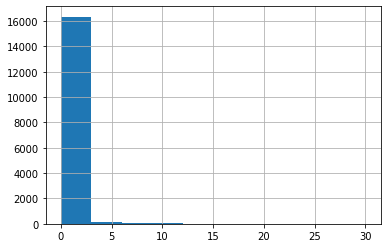

In [58]:
df_byaddress.replace(np.inf,np.nan).dropna().Frequency_of_Complaints.hist()
plt.show()

In [60]:
df_byaddress.replace(np.inf,np.nan).dropna().Frequency_of_Complaints.nlargest(20)

address
46 Paris St, 02128          30.0
102 West St, 02136          20.0
11 Bardwell St, 02130       20.0
117 Porter St, 02128        20.0
122 Eutaw St, 02128         20.0
135 High St, 02129          20.0
15 Countryside Dr, 02126    20.0
15 Wayburn Rd, 02130        20.0
19 Nixon St, 02124          20.0
262 Bowen St, 02127         20.0
351 Bowdoin St, 02122       20.0
368 Harvard St, 02124       20.0
4 Glenham St, 02132         20.0
431 River St, 02126         20.0
547 Beech St, 02131         20.0
57 Mather St, 02124         20.0
571 Weld St, 02132          20.0
6 Colorado St, 02126        20.0
104 Florence St, 02131      18.0
27 Westglow St, 02122       18.0
Name: Frequency_of_Complaints, dtype: float64

In [61]:
morethanonecomp_df = df_byaddress.replace(np.inf,np.nan).dropna()

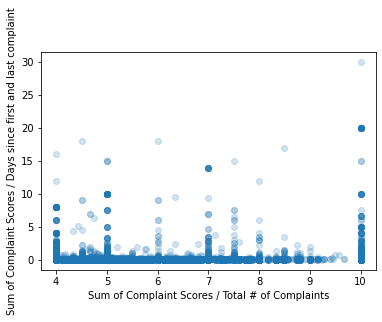

In [69]:
plt.scatter(morethanonecomp_df['Severity'],morethanonecomp_df['Frequency_of_Complaints'],alpha=.2)
plt.xlabel('Sum of Complaint Scores / Total # of Complaints')
plt.ylabel('Sum of Complaint Scores / Days since first and last complaint')
plt.show()

In [21]:
censust_df = df0[['address']]

In [22]:
censust_df = censust_df.merge(pd.get_dummies(df0.census_tract_number),left_index=True,right_index=True)

In [23]:
censust_df = df_byaddress.merge(censust_df.groupby('address').mean(),left_index=True,right_index=True)

In [24]:
censust_df2 = censust_df.replace(np.inf,np.nan).dropna()

In [25]:
censust_df2

,Severity,latitude,longitude,Index_Sum,Timeframe,Frequency_of_Complaints,25025000100.0,25025000201.0,25025000202.0,25025000301.0,...,25025130406.0,25025140102.0,25025140105.0,25025140106.0,25025140107.0,25025140201.0,25025140202.0,25025140300.0,25025140400.0,25025981300.0
address,,,,,,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",5.000000,42.314650,-71.093180,10,413 days 00:00:00,0.024213,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Acorn St, 02108",8.000000,42.357610,-71.068570,40,650 days 01:51:00,0.061538,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Aldie St, 02134",5.000000,42.359130,-71.136830,35,1386 days 00:00:00,0.025253,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Allen Rd, 02135",6.000000,42.349314,-71.159318,18,616 days 02:15:00,0.029221,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Allston St, 02124",5.555556,42.291900,-71.066530,50,1084 days 06:47:00,0.046125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99 Wayland St, 02125",4.625000,42.314301,-71.076220,37,1638 days 00:00:00,0.022589,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"99 Woodledge St, 02125",4.333333,42.314703,-71.074656,13,302 days 09:02:00,0.043046,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"994 River St, 02136",5.222222,42.260720,-71.114650,47,1400 days 00:00:00,0.033571,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
censust_df2.corr().loc['Severity'].nlargest(10)

Severity                   1.000000
Frequency_of_Complaints    0.120343
25025130200.0              0.054124
25025130100.0              0.052193
25025051200.0              0.042249
25025130406.0              0.038857
latitude                   0.037634
25025091001.0              0.032912
25025130300.0              0.030200
25025120104.0              0.029412
Name: Severity, dtype: float64

In [91]:
censust_df2.corr().loc['Index_Sum'].nlargest(10)

Index_Sum        1.000000
25025020200.0    0.088576
25025010802.0    0.079385
25025010701.0    0.079107
latitude         0.074681
25025000802.0    0.073015
25025010404.0    0.066986
25025030100.0    0.064146
25025080900.0    0.063725
25025010702.0    0.060910
Name: Index_Sum, dtype: float64

In [92]:
censust_df2.corr().loc['Frequency_of_Complaints'].nlargest(10)

Frequency_of_Complaints    1.000000
Severity                   0.120343
25025130100.0              0.062606
25025050600.0              0.046485
25025110201.0              0.036562
25025120104.0              0.029753
25025140105.0              0.025257
25025120103.0              0.025074
25025110607.0              0.020695
25025061000.0              0.020091
Name: Frequency_of_Complaints, dtype: float64

/var/folders/gn/2v3k2j5j1rl3jtww424x4zc40000gn/T/ipykernel_10516/2243615673.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(abs(corr), mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.color_palette("RdPu",20),


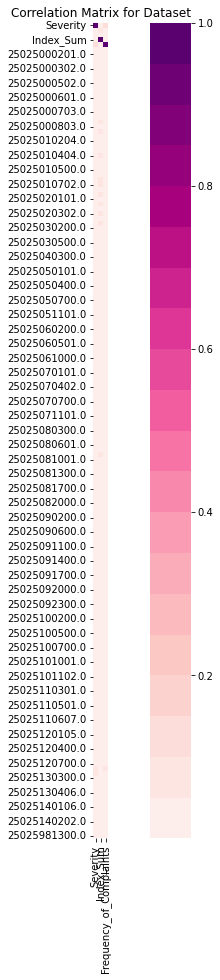

In [90]:
f, ax = plt.subplots(figsize=(15, 15))
corr = censust_df2.corr()[['Severity','Index_Sum','Frequency_of_Complaints']]
sns.heatmap(abs(corr), mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.color_palette("RdPu",20),
            square=True, ax=ax)
plt.title('Correlation Matrix for Dataset')
plt.show()

In [26]:
censust_df2

,Severity,latitude,longitude,Index_Sum,Timeframe,Frequency_of_Complaints,25025000100.0,25025000201.0,25025000202.0,25025000301.0,...,25025130406.0,25025140102.0,25025140105.0,25025140106.0,25025140107.0,25025140201.0,25025140202.0,25025140300.0,25025140400.0,25025981300.0
address,,,,,,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",5.000000,42.314650,-71.093180,10,413 days 00:00:00,0.024213,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Acorn St, 02108",8.000000,42.357610,-71.068570,40,650 days 01:51:00,0.061538,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Aldie St, 02134",5.000000,42.359130,-71.136830,35,1386 days 00:00:00,0.025253,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Allen Rd, 02135",6.000000,42.349314,-71.159318,18,616 days 02:15:00,0.029221,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Allston St, 02124",5.555556,42.291900,-71.066530,50,1084 days 06:47:00,0.046125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99 Wayland St, 02125",4.625000,42.314301,-71.076220,37,1638 days 00:00:00,0.022589,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"99 Woodledge St, 02125",4.333333,42.314703,-71.074656,13,302 days 09:02:00,0.043046,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"994 River St, 02136",5.222222,42.260720,-71.114650,47,1400 days 00:00:00,0.033571,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df0[['address'] + demo_vars].groupby('address').mean()

,ct_pop_disability,ct_pop_children_under_5,ct_pop_over_65,ct_pop_low_to_no_income,ct_pop_limited_english_proficiency,ct_pop_poc,ct_pop_med_illness,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_hh_income_200000_or_more,ct_perc_income_200000_or_more
address,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",646.0,704.0,312.0,1101.0,1413.0,3047.0,1160.74,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,15.0,1.061571
"1 Acorn St, 02108",172.0,595.0,541.0,280.0,821.0,411.0,1781.09,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,711.0,26.284658
"1 Adams St, 02129",141.0,322.0,290.0,214.0,504.0,116.0,917.28,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,328.0,25.625000
"1 Akron Pl, 02119",715.0,1250.0,420.0,1552.0,1972.0,3746.0,1404.47,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,43.0,2.694236
"1 Aldie St, 02134",639.0,469.0,220.0,3381.0,3601.0,3844.0,3004.10,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,105.0,3.987847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"994 River St, 02136",983.0,900.0,1016.0,1361.0,2377.0,5198.0,2480.86,15.402695,14.102162,15.919774,21.325603,37.245378,81.447822,38.872767,69.0,2.724043
"995 Centre St, 02130",234.0,364.0,546.0,206.0,752.0,554.0,1061.80,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,274.0,28.631139
"996 South St, 02131",486.0,772.0,987.0,675.0,1662.0,992.0,2177.40,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,266.0,11.955056


In [31]:
censust_df = censust_df.merge(df0[['address'] + demo_vars].groupby('address').mean(),left_index=True,right_index=True)

In [32]:
censust_df

,Severity,latitude,longitude,Index_Sum,Timeframe,Frequency_of_Complaints,25025000100.0,25025000201.0,25025000202.0,25025000301.0,...,ct_pop_med_illness,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_hh_income_200000_or_more,ct_perc_income_200000_or_more
address,,,,,,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",5.000000,42.31465,-71.09318,10,413 days 00:00:00,0.024213,0.0,0.0,0.0,0.0,...,1160.74,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,15.0,1.061571
"1 Acorn St, 02108",8.000000,42.35761,-71.06857,40,650 days 01:51:00,0.061538,0.0,0.0,0.0,0.0,...,1781.09,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,711.0,26.284658
"1 Adams St, 02129",5.000000,42.37484,-71.06004,5,0 days 00:00:00,inf,0.0,0.0,0.0,0.0,...,917.28,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,328.0,25.625000
"1 Akron Pl, 02119",5.000000,42.32572,-71.08477,5,0 days 00:00:00,inf,0.0,0.0,0.0,0.0,...,1404.47,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,43.0,2.694236
"1 Aldie St, 02134",5.000000,42.35913,-71.13683,35,1386 days 00:00:00,0.025253,0.0,0.0,0.0,0.0,...,3004.10,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,105.0,3.987847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"994 River St, 02136",5.222222,42.26072,-71.11465,47,1400 days 00:00:00,0.033571,0.0,0.0,0.0,0.0,...,2480.86,15.402695,14.102162,15.919774,21.325603,37.245378,81.447822,38.872767,69.0,2.724043
"995 Centre St, 02130",5.000000,42.30670,-71.12455,5,0 days 00:00:00,inf,0.0,0.0,0.0,0.0,...,1061.80,9.574468,14.893617,22.340426,8.428805,30.769231,22.667758,43.445172,274.0,28.631139
"996 South St, 02131",4.666667,42.28745,-71.13991,14,707 days 00:00:00,0.019802,0.0,0.0,0.0,0.0,...,2177.40,9.572582,15.205830,19.440615,13.295253,32.735868,19.539098,42.887532,266.0,11.955056


In [33]:
censust_df2 = censust_df.replace(np.inf,np.nan).dropna()

In [40]:
censust_df = df0[['address','census_tract_number']]

In [41]:
censust_df = df_byaddress.merge(censust_df.groupby('address').agg(pd.Series.mode),left_index=True,right_index=True)

In [42]:
censust_df

,Severity,latitude,longitude,Index_Sum,Timeframe,Frequency_of_Complaints,census_tract_number
address,,,,,,,
"1 Abbotsford St, 02121",5.000000,42.31465,-71.09318,10,413 days 00:00:00,0.024213,25025081900.0
"1 Acorn St, 02108",8.000000,42.35761,-71.06857,40,650 days 01:51:00,0.061538,25025020101.0
"1 Adams St, 02129",5.000000,42.37484,-71.06004,5,0 days 00:00:00,inf,25025040100.0
"1 Akron Pl, 02119",5.000000,42.32572,-71.08477,5,0 days 00:00:00,inf,25025081700.0
"1 Aldie St, 02134",5.000000,42.35913,-71.13683,35,1386 days 00:00:00,0.025253,25025000802.0
...,...,...,...,...,...,...,...
"994 River St, 02136",5.222222,42.26072,-71.11465,47,1400 days 00:00:00,0.033571,25025140300.0
"995 Centre St, 02130",5.000000,42.30670,-71.12455,5,0 days 00:00:00,inf,25025120105.0
"996 South St, 02131",4.666667,42.28745,-71.13991,14,707 days 00:00:00,0.019802,25025110607.0


In [43]:
censust_df2 = censust_df.replace(np.inf,np.nan).dropna()

In [44]:
censust_df2

,Severity,latitude,longitude,Index_Sum,Timeframe,Frequency_of_Complaints,census_tract_number
address,,,,,,,
"1 Abbotsford St, 02121",5.000000,42.314650,-71.093180,10,413 days 00:00:00,0.024213,25025081900.0
"1 Acorn St, 02108",8.000000,42.357610,-71.068570,40,650 days 01:51:00,0.061538,25025020101.0
"1 Aldie St, 02134",5.000000,42.359130,-71.136830,35,1386 days 00:00:00,0.025253,25025000802.0
"1 Allen Rd, 02135",6.000000,42.349314,-71.159318,18,616 days 02:15:00,0.029221,25025000202.0
"1 Allston St, 02124",5.555556,42.291900,-71.066530,50,1084 days 06:47:00,0.046125,25025092200.0
...,...,...,...,...,...,...,...
"99 Wayland St, 02125",4.625000,42.314301,-71.076220,37,1638 days 00:00:00,0.022589,25025090400.0
"99 Woodledge St, 02125",4.333333,42.314703,-71.074656,13,302 days 09:02:00,0.043046,25025090400.0
"994 River St, 02136",5.222222,42.260720,-71.114650,47,1400 days 00:00:00,0.033571,25025140300.0


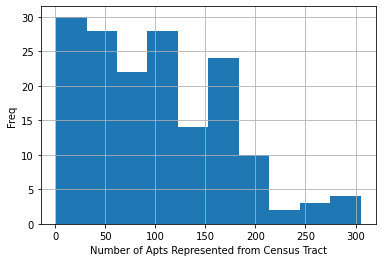

In [64]:
censust_df2.groupby('census_tract_number').count().Severity.hist()
plt.xlabel('Number of Apts Represented from Census Tract')
plt.ylabel('Freq')
plt.show()

In [48]:
compare_cts_df = censust_df2.groupby('census_tract_number')[['Severity','Index_Sum','Frequency_of_Complaints']].mean().rename(columns={'Severity':'Avg_Severity_Score','Index_Sum':'Avg_Index_Sum_Score','Frequency_of_Complaints':'Avg_Freq_Score'})

In [68]:
compare_cts_df = compare_cts_df.merge(censust_df2.groupby('census_tract_number').count().Severity.rename('Apartment_Count'),left_index=True,right_index=True)

In [69]:
compare_cts_df

,Avg_Severity_Score,Avg_Index_Sum_Score,Avg_Freq_Score,Apartment_Count
census_tract_number,,,,
25025000100.0,5.535272,32.089172,0.082767,157
25025000201.0,5.344551,25.048193,0.129212,166
25025000202.0,5.579002,24.638037,0.248625,163
25025000301.0,5.285574,22.243697,0.212405,119
25025000302.0,5.115501,28.563107,0.255248,103
...,...,...,...,...
25025140202.0,5.709582,29.103896,0.427068,77
25025140300.0,5.373756,33.270968,0.234684,155
25025140400.0,5.083425,24.980769,0.156006,52


In [71]:
compare_cts_df.nlargest(20,'Avg_Severity_Score')

,Avg_Severity_Score,Avg_Index_Sum_Score,Avg_Freq_Score,Apartment_Count
census_tract_number,,,,
25025020301.0,8.714286,122.000000,0.121635,1
25025070402.0,7.272727,80.000000,0.049566,1
25025020303.0,7.000000,91.000000,0.057888,1
25025130406.0,6.580336,28.431818,0.313204,44
25025130100.0,6.488513,22.389474,1.159181,95
25025130200.0,6.457496,20.449541,0.239289,109
25025030300.0,6.412092,68.000000,0.080043,6
25025120105.0,6.370792,24.294118,0.409784,34
25025120104.0,6.298731,25.212766,0.852552,47


In [56]:
compare_cts_df.corr()

,Avg_Severity_Score,Avg_Index_Sum_Score,Avg_Freq_Score
Avg_Severity_Score,1.000000,0.186258,0.092889
Avg_Index_Sum_Score,0.186258,1.000000,-0.409736
Avg_Freq_Score,0.092889,-0.409736,1.000000


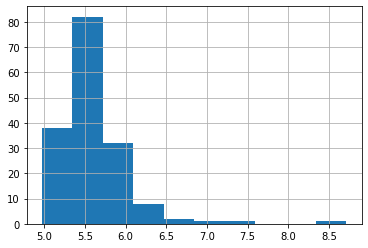

In [51]:
compare_cts_df.Avg_Severity_Score.hist()
plt.show()

In [53]:
compare_cts_df.Avg_Severity_Score.nlargest(10)

census_tract_number
25025020301.0    8.714286
25025070402.0    7.272727
25025020303.0    7.000000
25025130406.0    6.580336
25025130100.0    6.488513
25025130200.0    6.457496
25025030300.0    6.412092
25025120105.0    6.370792
25025120104.0    6.298731
25025091001.0    6.244566
Name: Avg_Severity_Score, dtype: float64

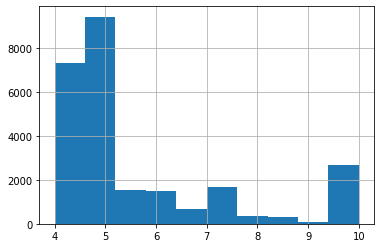

In [58]:
df_byaddress.Severity.hist()
plt.show()

In [59]:
df_byaddress.Severity.mean()

5.635389837924258

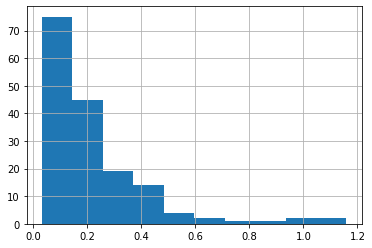

In [52]:
compare_cts_df.Avg_Freq_Score.hist()
plt.show()

In [54]:
compare_cts_df.Avg_Freq_Score.nlargest(10)

census_tract_number
25025130100.0    1.159181
25025110201.0    1.112129
25025120103.0    0.968156
25025050600.0    0.942628
25025120104.0    0.852552
25025070200.0    0.710980
25025061000.0    0.669323
25025120700.0    0.648873
25025110301.0    0.571390
25025140105.0    0.556900
Name: Avg_Freq_Score, dtype: float64

In [ ]:
parcel_df = df0[['address']]

In [73]:
parcel_df = parcel_df.merge(pd.get_dummies(df0.parcel),left_index=True,right_index=True)

In [74]:
parcel_df = df_byaddress.merge(parcel_df.groupby('address').mean(),left_index=True,right_index=True)

KeyboardInterrupt: 

In [ ]:
parcel_df2 = parcel_df.replace(np.inf,np.nan).dropna()

In [ ]:
parcel_df2.corr().loc['Severity'].nlargest(10)

In [92]:
parcel_df2.corr().loc['Frequency_of_Complaints'].nlargest(10)

Frequency_of_Complaints    1.000000
Severity                   0.120343
25025130100.0              0.062606
25025050600.0              0.046485
25025110201.0              0.036562
25025120104.0              0.029753
25025140105.0              0.025257
25025120103.0              0.025074
25025110607.0              0.020695
25025061000.0              0.020091
Name: Frequency_of_Complaints, dtype: float64

In [91]:
parcel_df2.corr().loc['Index_Sum'].nlargest(10)

Index_Sum        1.000000
25025020200.0    0.088576
25025010802.0    0.079385
25025010701.0    0.079107
latitude         0.074681
25025000802.0    0.073015
25025010404.0    0.066986
25025030100.0    0.064146
25025080900.0    0.063725
25025010702.0    0.060910
Name: Index_Sum, dtype: float64

In [10]:
X = df_byaddress.iloc[:,1:]

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
pca = PCA().fit(X)

In [13]:
X_pca = pca.transform(X)

In [14]:
X_pca.shape

(25560, 2)

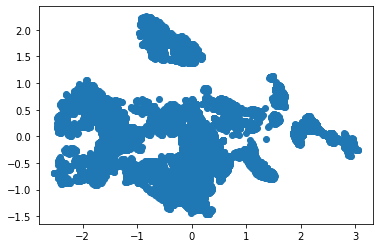

In [18]:
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

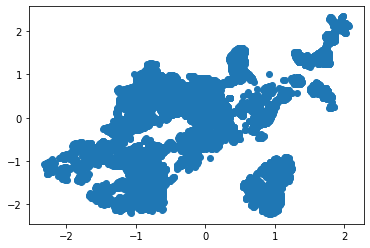

In [19]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [20]:
df2 = df1.merge(pd.get_dummies(df0['parcel']),left_index=True,right_index=True)

In [9]:
df_byaddress = df1.groupby('address').mean()

In [27]:
df_byaddress

,Index,latitude,longitude
address,,,
"1 Abbotsford St, 02121",5.000000,42.31465,-71.09318
"1 Acorn St, 02108",8.000000,42.35761,-71.06857
"1 Adams St, 02129",5.000000,42.37484,-71.06004
"1 Akron Pl, 02119",5.000000,42.32572,-71.08477
"1 Aldie St, 02134",5.000000,42.35913,-71.13683
...,...,...,...
"994 River St, 02136",5.222222,42.26072,-71.11465
"995 Centre St, 02130",5.000000,42.30670,-71.12455
"996 South St, 02131",4.666667,42.28745,-71.13991


In [10]:
X = df_byaddress.iloc[:,1:]

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
pca = PCA().fit(X)

In [13]:
X_pca = pca.transform(X)

In [14]:
X_pca.shape

(25560, 2)

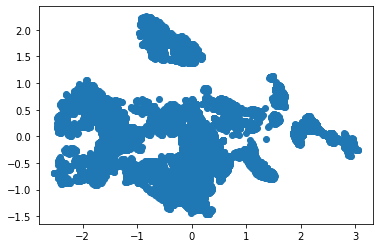

In [18]:
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

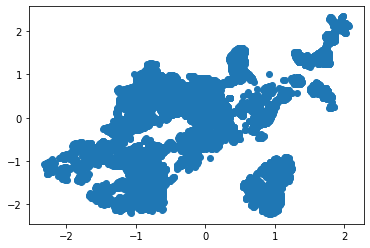

In [19]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [22]:
df0.census_tract_number.nunique()

164

In [21]:
loc_vars_categorical_df0 = pd.get_dummies(df0[loc_vars_categorical])

In [22]:
loc_vars_categorical_df0

,neighborhood_Allston,neighborhood_Boston,neighborhood_Brighton,neighborhood_Charlestown,neighborhood_Chestnut Hill,neighborhood_Dorchester,neighborhood_East Boston,neighborhood_Hyde Park,neighborhood_Jamaica Plain,neighborhood_Mattapan,...,parcel_903794000,parcel_903797000,parcel_903798000,parcel_903800000,parcel_903809000,parcel_903810000,parcel_903811000,parcel_903812000,parcel_903814000,parcel_903882010
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127227,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127228,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127229,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127230,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df1 = df1.merge(loc_vars_categorical_df0,left_index=True,right_index=True)

In [26]:
df1

,address,Index,latitude,longitude,neighborhood_Allston,neighborhood_Boston,neighborhood_Brighton,neighborhood_Charlestown,neighborhood_Chestnut Hill,neighborhood_Dorchester,...,parcel_903794000,parcel_903797000,parcel_903798000,parcel_903800000,parcel_903809000,parcel_903810000,parcel_903811000,parcel_903812000,parcel_903814000,parcel_903882010
0,"39 Millmont St, 02119",5,42.327532,-71.090943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"39 Millmont St, 02119",5,42.327532,-71.090943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"39 Millmont St, 02119",5,42.327532,-71.090943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"39 Millmont St, 02119",10,42.327532,-71.090943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"39 Millmont St, 02119",5,42.327532,-71.090943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127227,"15 Bradshaw St, 02121",5,42.299000,-71.082250,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
127228,"133 Putnam St, 02128",5,42.378292,-71.032153,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127229,"31 Prescott St, 02128",5,42.379940,-71.030620,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127230,"131 Putnam St, 02128",5,42.378350,-71.032210,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df1.dtypes

address                  object
Index                     int64
latitude                float64
longitude               float64
neighborhood_Allston      uint8
                         ...   
parcel_903810000          uint8
parcel_903811000          uint8
parcel_903812000          uint8
parcel_903814000          uint8
parcel_903882010          uint8
Length: 25589, dtype: object

In [28]:
df_byaddress = df1.groupby('address').mean()

In [30]:
df_byaddress.head()

,Index,latitude,longitude,neighborhood_Allston,neighborhood_Boston,neighborhood_Brighton,neighborhood_Charlestown,neighborhood_Chestnut Hill,neighborhood_Dorchester,neighborhood_East Boston,...,parcel_903794000,parcel_903797000,parcel_903798000,parcel_903800000,parcel_903809000,parcel_903810000,parcel_903811000,parcel_903812000,parcel_903814000,parcel_903882010
address,,,,,,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",5.0,42.31465,-71.09318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Acorn St, 02108",8.0,42.35761,-71.06857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Adams St, 02129",5.0,42.37484,-71.06004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Akron Pl, 02119",5.0,42.32572,-71.08477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1 Aldie St, 02134",5.0,42.35913,-71.13683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X = df_byaddress.iloc[:,1:]

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pca = PCA().fit(X)

In [20]:
X_pca = pca.transform(X)

In [21]:
X_pca.shape

(25560, 180)

In [ ]:
df_byaddress